In [31]:
from sklearn.datasets import load_iris
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score

In [8]:
class LearningRateReducerCb(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    old_lr = self.model.optimizer.lr.read_value()
    new_lr = old_lr * 0.99
    print("\nEpoch: {}. Reducing Learning Rate from {} to {}".format(epoch, old_lr, new_lr))
    self.model.optimizer.lr.assign(new_lr)
    
def create_checkpoint_callback(model_name):
  return tf.keras.callbacks.ModelCheckpoint(filepath=f"{model_name}/checkpoint.ckpt",
                                                          #  monitor="val_accuracy",
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           save_freq="epoch")

es_cb = EarlyStopping(monitor='val_loss', patience=10)

In [5]:
data = pd.read_json("iris.json")
data

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
x=data.drop(['species'],axis=1)
y=data['species']

In [9]:
minmax=MinMaxScaler()
minmax.fit(x)
x=minmax.transform(x)

In [11]:
le=LabelEncoder()
le.fit(y)
y=le.transform(y)

In [15]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=20,shuffle=True,random_state=42)

In [18]:
model_0 = tf.keras.Sequential([
  layers.Dense(100, activation="relu"),
  layers.Dense(10, activation="softmax")
],name='multiclassification')
# Compile the model
model_0.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
model_0_history = model_0.fit(x=X_train, 
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=200,
                             callbacks=[create_checkpoint_callback(model_0.name),es_cb])

Epoch 1/200
5/5 [==============================] - 0s 31ms/step - loss: 2.3086 - accuracy: 0.3385 - val_loss: 2.2424 - val_accuracy: 0.3000
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 2.2192 - accuracy: 0.3385 - val_loss: 2.1619 - val_accuracy: 0.3000
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 2.1370 - accuracy: 0.3385 - val_loss: 2.0871 - val_accuracy: 0.3000
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 2.0580 - accuracy: 0.3385 - val_loss: 2.0120 - val_accuracy: 0.3000
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 1.9797 - accuracy: 0.3385 - val_loss: 1.9346 - val_accuracy: 0.3000
Epoch 6/200
5/5 [==============================] - 0s 13ms/step - loss: 1.9013 - accuracy: 0.3385 - val_loss: 1.8563 - val_accuracy: 0.3000
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 1.8205 - accuracy: 0.3692 - val_loss: 1.7751 - val_accuracy: 0.4000
Epoch 8/200
5/5 [===

5/5 [==============================] - 0s 6ms/step - loss: 0.2774 - accuracy: 0.9692 - val_loss: 0.2882 - val_accuracy: 0.9500
Epoch 118/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2729 - accuracy: 0.9769 - val_loss: 0.2961 - val_accuracy: 0.9500
Epoch 119/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2697 - accuracy: 0.9692 - val_loss: 0.3064 - val_accuracy: 0.9500
Epoch 120/200
5/5 [==============================] - 0s 8ms/step - loss: 0.2690 - accuracy: 0.9538 - val_loss: 0.3036 - val_accuracy: 0.9500
Epoch 121/200
5/5 [==============================] - 0s 9ms/step - loss: 0.2665 - accuracy: 0.9538 - val_loss: 0.2972 - val_accuracy: 0.9500
Epoch 122/200
5/5 [==============================] - 0s 8ms/step - loss: 0.2642 - accuracy: 0.9615 - val_loss: 0.2973 - val_accuracy: 0.9500
Epoch 123/200
5/5 [==============================] - 0s 8ms/step - loss: 0.2624 - accuracy: 0.9615 - val_loss: 0.2936 - val_accuracy: 0.9500
Epoch 124/200
5/5 [========

In [19]:
model_0.summary()

Model: "multiclassification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               500       
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Load best model and evaluate on test data
model_0.load_weights("multiclassification/checkpoint.ckpt")
model_0.evaluate(X_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 0.2484 - accuracy: 0.9500


[0.24844102561473846, 0.949999988079071]

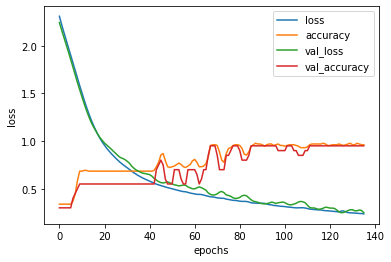

In [21]:
pd.DataFrame(model_0_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [22]:
model_0.save("multiclassification/Model_0.h5")
model_0.save("multiclassification/Model_0.pb")

INFO:tensorflow:Assets written to: multiclassification/Model_0.pb\assets


In [32]:
model_0_pred_prob = model_0.predict(X_test)
model_0_pred=tf.argmax(model_0_pred_prob, axis=1)
model_0_accuracy = accuracy_score(y_true=y_test, y_pred=model_0_pred)
model_0_accuracy

0.95

In [33]:
from sklearn.metrics import precision_recall_fscore_support

model_0_precision, model_0_recall, model_0_f1, _ = precision_recall_fscore_support(y_true=y_test,
                                                                                y_pred=model_0_pred,
                                                                                average="weighted")
model_0_precision, model_0_recall, model_0_f1

(0.9583333333333334, 0.95, 0.9508021390374332)

In [34]:
model_0_results = {
    "accuracy": model_0_accuracy,
    "precision": model_0_precision,
    "recall": model_0_recall,
    "f1": model_0_f1
}

model_0_results

{'accuracy': 0.95,
 'precision': 0.9583333333333334,
 'recall': 0.95,
 'f1': 0.9508021390374332}

In [37]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

In [39]:
model_0_preds = model_0.predict(X_test)
model_0_preds=tf.argmax(model_0_preds, axis=1)
model_0_preds.numpy()

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2],
      dtype=int64)

In [40]:
le.inverse_transform(model_0_preds)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica'], dtype=object)